# Salary Trend of MLB Players

### Table of Contents
1. Purpose 
2. Data  
3. Exploratory Analysis  
      3.1. Team Budget for Salary  
      3.2. Summary Statistics of Salary  
      3.3. Characteristics of High Paid Players  
4. Summary 

## 1. Purpose

The purpose of this report is to shed light on hidden trends in the historical salary data of Major League Baseball (MLB) players through exploratory analysis. Specifically, the data is explored through the following questions.  

1. *How much budget did each team have for players' salary and how has it changed over time?*
2. *How has the summary statistics of salary changed over time?*
3. *What characteristics do high paid players have?*  

## 2. Data

The data used for the analysis is derived from [SeanLahman.com](http://www.seanlahman.com/baseball-archive/statistics/) which provides a free historical MLB data.  

[Data Link] [lahman-csv_2015-01-24.zip](http://seanlahman.com/files/database/lahman-csv_2015-01-24.zip)  
[Version] 2014 – comma-delimited version – Updated January 24, 2015  

The zip file contains 24 csv files and only the following three files are used.

1. Salaries.csv - player salary data
2. Pitching.csv - pitching statistics
3. Batting.csv  - batting statistics

Those are loaded into Pandas DataFrame as follows.

In [1]:
import pandas as pd
salaries = pd.read_csv('./lahman-csv_2015-01-24/Salaries.csv')
pitching = pd.read_csv('./lahman-csv_2015-01-24/Pitching.csv')
batting = pd.read_csv('./lahman-csv_2015-01-24/Batting.csv')

In [2]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In the *salaries*, the column names are almost self-explanatory. Only a little cryptic one is lgID which stands for League ID. The *salaries* contains anual, individual salary.

In [3]:
salaries['yearID'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

The history of salary covered by the data is from 1985 to 2014.

In [4]:
pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [5]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13,8,1,4,0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19,3,1,2,5,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27,1,1,0,2,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16,6,2,2,1,NaN,NaN,NaN,NaN,NaN


The definition of columns are as follows.

In [8]:
# [Pitching]
#    playerID       Player ID code
#    yearID         Year
#    stint          player's stint (order of appearances within a season)
#    teamID         Team
#    lgID           League
#    W              Wins
#    L              Losses
#    G              Games
#    GS             Games Started
#    CG             Complete Games 
#    SHO            Shutouts
#    SV             Saves
#    IPOuts         Outs Pitched (innings pitched x 3)
#    H              Hits
#    ER             Earned Runs
#    HR             Homeruns
#    BB             Walks
#    SO             Strikeouts
#    BAOpp          Opponent's Batting Average
#    ERA            Earned Run Average
#    IBB            Intentional Walks
#    WP             Wild Pitches
#    HBP            Batters Hit By Pitch
#    BK             Balks
#    BFP            Batters faced by Pitcher
#    GF             Games Finished
#    R              Runs Allowed
#    SH             Sacrifices by opposing batters
#    SF             Sacrifice flies by opposing batters
#    GIDP           Grounded into double plays by opposing batter
pitching.columns

Index([u'playerID', u'yearID', u'stint', u'teamID', u'lgID', u'W', u'L', u'G',
       u'GS', u'CG', u'SHO', u'SV', u'IPouts', u'H', u'ER', u'HR', u'BB',
       u'SO', u'BAOpp', u'ERA', u'IBB', u'WP', u'HBP', u'BK', u'BFP', u'GF',
       u'R', u'SH', u'SF', u'GIDP'],
      dtype='object')

In [9]:
# Batting Table
#    playerID       Player ID code
#    yearID         Year
#    stint          player's stint (order of appearances within a season)
#    teamID         Team
#    lgID           League
#    G              Games
#    AB             At Bats
#    R              Runs
#    H              Hits
#    2B             Doubles
#    3B             Triples
#    HR             Homeruns
#    RBI            Runs Batted In
#    SB             Stolen Bases
#    CS             Caught Stealing
#    BB             Base on Balls
#    SO             Strikeouts
#    IBB            Intentional walks
#    HBP            Hit by pitch
#    SH             Sacrifice hits
#    SF             Sacrifice flies
#    GIDP           Grounded into double plays
batting.columns

Index([u'playerID', u'yearID', u'stint', u'teamID', u'lgID', u'G', u'AB', u'R',
       u'H', u'2B', u'3B', u'HR', u'RBI', u'SB', u'CS', u'BB', u'SO', u'IBB',
       u'HBP', u'SH', u'SF', u'GIDP'],
      dtype='object')

## 3. Exploratory Analysis

### 3.1. Team Budget for Salary

So let's start with checking how much budget each team had in each year. To do so, *salaries* has to be aggregated and transformed.

In [10]:
budget = salaries.groupby(['yearID', 'teamID'], as_index=False)['salary'].sum()
budget = budget.pivot(index='yearID', columns='teamID', values='salary')

In [11]:
budget.head()

teamID,ANA,ARI,ATL,BAL,BOS,CAL,CHA,CHN,CIN,CLE,...,PIT,SDN,SEA,SFG,SFN,SLN,TBA,TEX,TOR,WAS
yearID,,,,,,,,,,,,,,,,,,,,,
1985,NaN,NaN,14807000,11560712,10897560,14427894,9846178,12702917,8359917,6551666,...,9227500,11036583,4613000,NaN,8221714,11817083,NaN,7676500,8812550,NaN
1986,NaN,NaN,17102786,13001258,14402239,14427258,10418819,17208165,11906388,7809500,...,10843500,11380693,5958309,NaN,8947000,9875010,NaN,6743119,12611047,NaN
1987,NaN,NaN,16544560,13900273,10144167,12843499,10641843,14307999,9281500,8513750,...,7652000,11065796,2263500,NaN,7290000,11758000,NaN,880000,10479501,NaN
1988,NaN,NaN,12728174,13532075,13896092,11947388,6390000,13119198,8888409,8936500,...,5998500,9561002,7342450,NaN,12380000,12880000,NaN,5342131,12241225,NaN
1989,NaN,NaN,11112334,8275167,17481748,15097833,7265410,10668000,11072000,9094500,...,12737500,14195000,9779500,NaN,14962834,16078833,NaN,11893781,16261666,NaN


The *budget* represents yearly budget for each team nicely. *NaN* appears where that team did not exist.  
[Reference] [Baseball/Team abbreviations](https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Baseball/Team_abbreviations)

To have more intuitive sense, a line plot is created as follows.

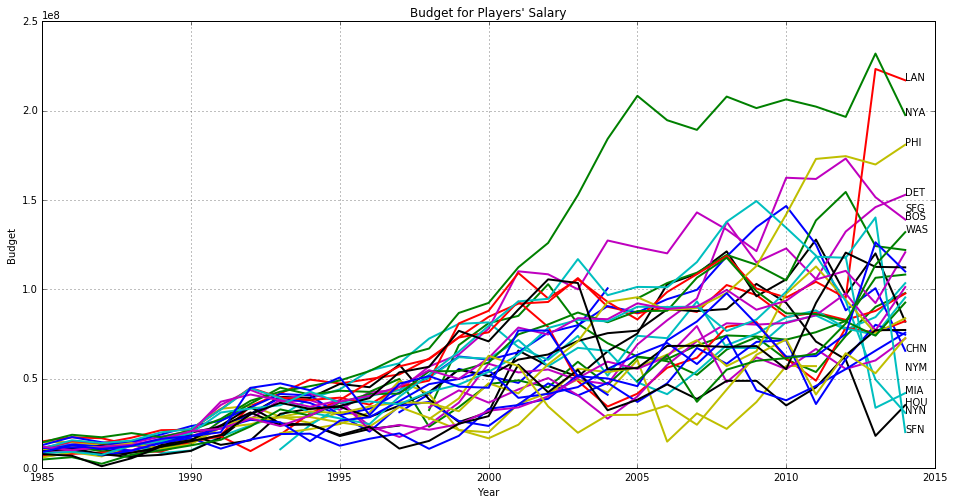

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
for team in budget.columns:
    plt.plot(budget.index, budget[team], lw=2.0)
for team in budget.columns:
    # Only top and bottom teams are annotated
    if (budget.loc[2014, team] > 130e+06 or budget.loc[2014, team] < 70e+06):
        plt.annotate(team, xy=(2014, budget.loc[2014, team]))
plt.title('Budget for Players\' Salary')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.grid(True)
plt.show()

Each line represents one team and some top and bottom teams as of 2014 are annotated at the right.  
In general the following characteristics are observed although the impression might change if the currency value is considered.  

* All teams' budgets were in a narrow range during early years, especially between 1985 to 1990. 
* Budget increases as time goes by.
* Range of fluctuation increases as time goes by.

Also in recent years some notable phenomenons are observed.  

* New York Yankees (NYA) budget rocketed from 2000 and had been a king during 2000s (2014 is an exception).
* Los Angeles Dodgers (LAN) got a big spike from 2012 to 2013.  
* San Francisco Giants (SFN) got a big drop from 2013 to 2014.

It would be very interesting if we further check what happened when those phenomenons occurred though, it's not covered in this report.

### 3.2. Summary Statistics of Salary

Next let's examine how individual salary changed over time. To capture a big picture, summary statistics is aggregated and visualized.

In [13]:
# Prepare DataFrame for summary satistics aggregation
yearstat = pd.DataFrame(index=salaries['yearID'].unique(), \
                        columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
# Aggregate yearly summary statistics
for year, grouped in salaries.groupby('yearID', as_index=False)['salary']:
    yearstat.loc[year] = grouped['salary'].describe()

In [14]:
yearstat.head()

,count,mean,std,min,25%,50%,75%,max
1985,550,476299,343321,60000,205625,400000,650000,2.1303e+06
1986,738,417147,394018,60000,88500,294404,650000,2.8e+06
1987,627,434729,431182,62500,85000,285000,675000,2.12733e+06
1988,663,453171,453158,62500,102500,295000,693254,2.34e+06
1989,711,506323,538045,62500,95000,300000,750000,2.76667e+06


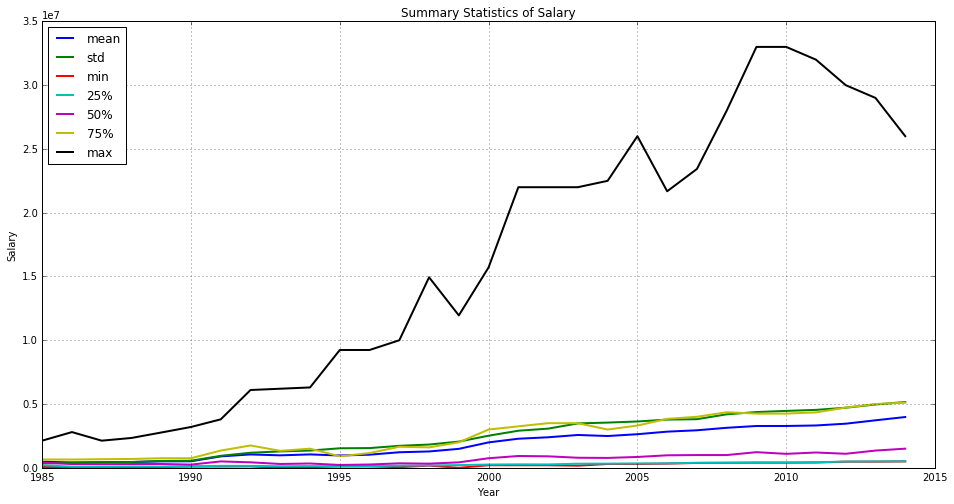

In [15]:
plt.figure(figsize=(16, 8))
for stat in yearstat.columns.drop('count'):
    plt.plot(yearstat.index, yearstat[stat], lw=2.0)
plt.legend(yearstat.columns.drop('count'), loc='best')
plt.title('Summary Statistics of Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

What's eye catching is the constant rise of black line, the highest salary. It makes the other lines indistinguishable. So let's see how it look like when the black line is removed.

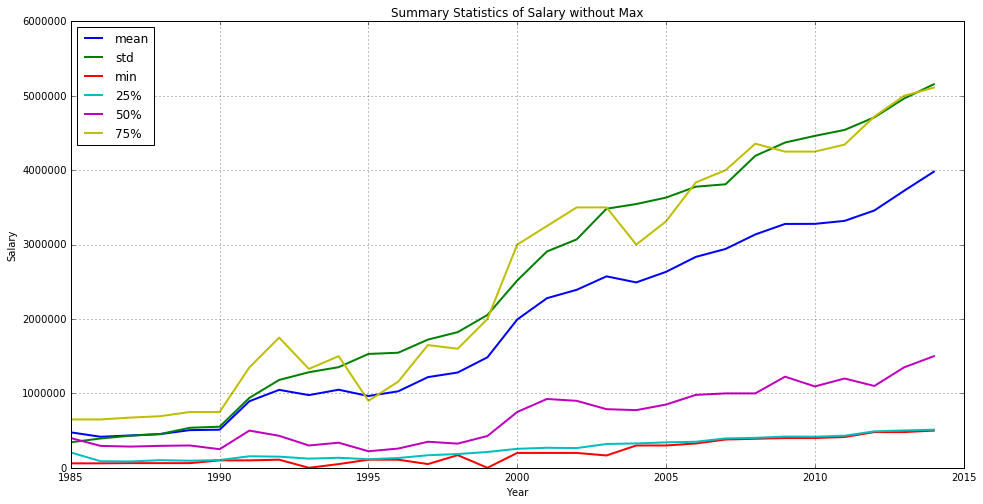

In [16]:
# Plot without max to describe the other better
plt.figure(figsize=(16, 8))
for stat in yearstat.columns.drop(['count', 'max']):
    plt.plot(yearstat.index, yearstat[stat], lw=2.0)
plt.legend(yearstat.columns.drop(['count', 'max']), loc='best')
plt.title('Summary Statistics of Salary without Max')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

As opposed to the impression from the first plot, standard deviation, mean and 75% lines are relatively steep. Meanwhile the rise of median (50%) is slow and the minimum and 25% lines are almost the same and unchanged. From those observation, we can say the following about the historical trend.  

1. Top players' salary has been getting higher and higher over the time and it causes pushing up the mean and the variance. The slope of curve is steeper as salary goes up. 
2. Bottom players' salary has not changed so much. Actually the lowest 25% players earn almost the same salary as compared to the variance of top players.

If you are a MLB player and want to earn more, you need to rank at least top 50% to get a ride on steep curve.  
Let's see the fact from another angle.

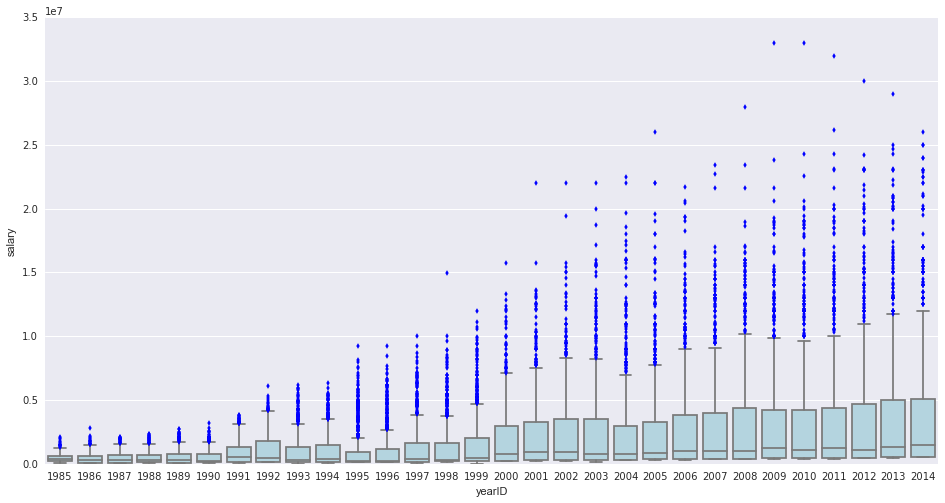

In [18]:
import seaborn as sns

plt.figure(figsize=(16, 8))
_ = sns.boxplot(x='yearID', y='salary', data=salaries, fliersize=4, color='lightblue')

As speculated above, the outliers of boxplot shows the steepness of top players' curve while the bottom half stays low. The number of outliers which exceed 1.5 times of [IQR](https://en.wikipedia.org/wiki/Interquartile_range) seems to be around 20 to 30 always after the year 2000.

### 3.3. Characteristics of High Paid Players

So now let's take a look at the relationship between salary and performance data. Here I separate all players into two categories, pitchers and batters and use the following assumptions.  

- Pitchers are mostly evaluated by their pitching performance  
- Fielders are mostly evaluated by their batting performance  

To start the analysis, the preparation is performed as follows.

In [19]:
# Change column names which start with number
batting.rename(columns={"2B":"H2B", "3B":"H3B"}, inplace=True)
# Add total batting performance measurement
batting['TH'] = batting['H'] + batting['H2B'] + batting['H3B'] + batting['HR']

# Set concatenation of key column values as index
pitching.index = pitching['yearID'].astype(str) + pitching['teamID'].astype(str) + pitching['playerID'].astype(str)
batting.index = batting['yearID'].astype(str) + batting['teamID'].astype(str) + batting['playerID'].astype(str)                 
# Drop pitchers' batting performance
batting = batting[~batting.index.isin(pitching.index)]

In a general sense, salary is determined by the previous year's performance at the beginning of each season. So a column called *yearBasedOn* in *salaries* is created and used to join to the performance data.

In [20]:
# Merge salaries to performance data
#  [Assumption]
#    Salary is determined by the previous year's result
#     Performance    Salary
#        2013  ---->  2014
#        2012  ---->  2013
#        2011  ---->  2012
#        ....         ....
salaries['yearBasedOn'] = salaries['yearID'] - 1
pitching = pitching.merge(salaries, how='left', \
                          left_on=['yearID', 'teamID', 'lgID', 'playerID'], \
                          right_on=['yearBasedOn', 'teamID', 'lgID', 'playerID'])
batting = batting.merge(salaries, how='left', \
                        left_on=['yearID', 'teamID', 'lgID', 'playerID'], \
                        right_on=['yearBasedOn', 'teamID', 'lgID', 'playerID'])

# Remove unnecessary column used for merge
pitching.drop('yearBasedOn', axis=1, inplace=True)
batting.drop('yearBasedOn', axis=1, inplace=True)

# Rename and distinguish yearID: 
#  - Performance year ID: pyearID
#  - Salary yera ID:      syearID
pitching.rename(columns={"yearID_x":"pyearID", "yearID_y":"syearID"}, inplace=True)
batting.rename(columns={"yearID_x":"pyearID", "yearID_y":"syearID"}, inplace=True)

# Drop rows whose salary data is not available
pitching = pitching[pitching['salary'].notnull()]
batting = batting[batting['salary'].notnull()]

To eliminate a concern about value of currency and to simplify analysis, only the year 2014 is sliced out.  
From now on, the piece sliced out is used.

In [21]:
pit_recent = pitching[pitching['syearID'] == 2014]
bat_recent = batting[batting['syearID'] == 2014]
print pit_recent.shape
print bat_recent.shape

(269, 32)
(301, 25)


For pitching data, let's check the following major performance indicators.
- *W* : Wins
- *L* : Losses
- *G* : Games
- *GS*: Games Started
- *GF*: Games Finished

To see the relationship between salary and those indicators, pairwise scatter plot is generated as follows.

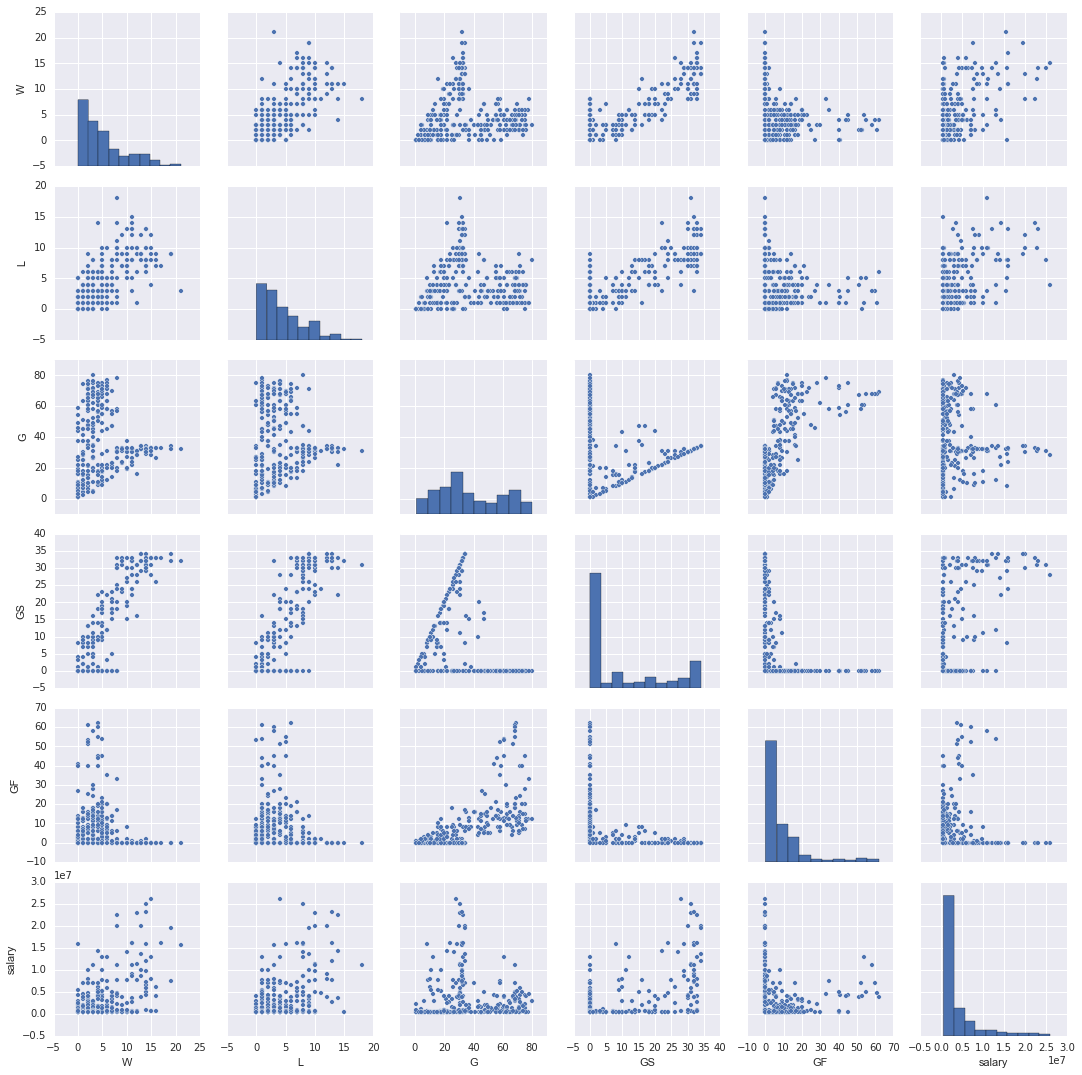

In [23]:
_ = sns.pairplot(pit_recent, vars=['W', 'L', 'G', 'GS', 'GF', 'salary'])

Since we are checking the relationship between salary and those performance indicators, the focus should be on the last row. As opposed to my intuition, it is observed that Wins and Losses are not significant factors to determine salary. We can see that some high paid pitchers have less than 10 wins or more than 10 losses.  

How about the number of games? Those are also not deterministic factors though, an interesting trend for high paid players is observed. If we focus on top 10 pitchers, all of them seems to have almost the same number of Games, Games Started and Games Finished.  
- Around 30 Games
- Around 30 Games Started
- Around 0 Games Finished

This means that the highest paid pitchers are usually starting pitchers and do not play until the end of game.

Next, for batters, the following major performance indicators are checked.
- H  : Hits
- H2B: Doubles
- H3B: Triples
- HR : Homeruns
- TH : Total Hits (total of above)

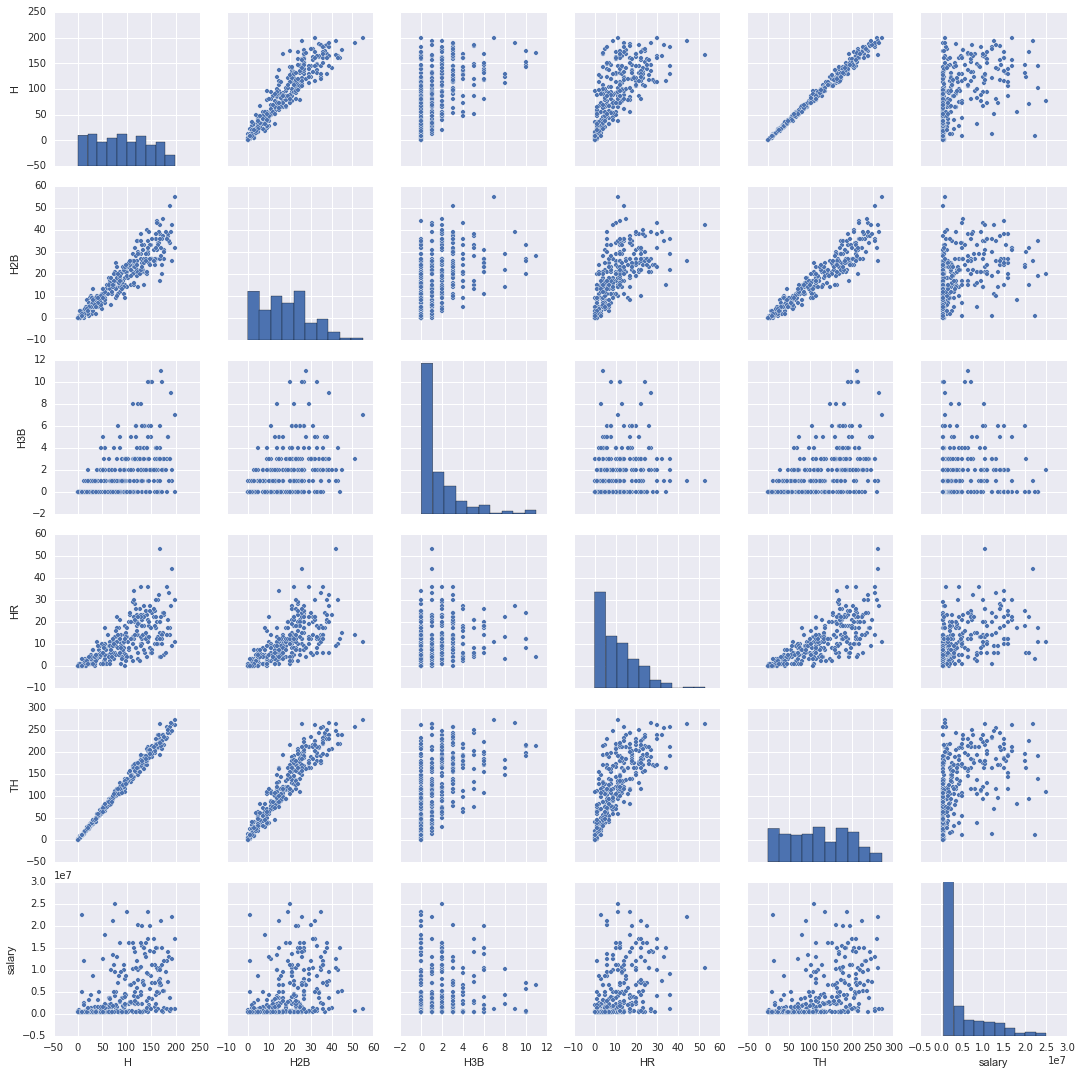

In [24]:
_ = sns.pairplot(bat_recent, vars=['H', 'H2B', 'H3B', 'HR', 'TH', 'salary'])

Again, the focus is on the last row. Unfortunately any of those major performance indicators does not seem to be deterministic about salary. What's slightly interesting is that even for the highest paid batters it seems to be difficult to get Triples. But other than that, there is no visual trend.  

Since it's not visually recognizable, let's check it from numbers, namely correlation.

In [25]:
bat_recent[['H', 'H2B', 'H3B', 'HR', 'TH', 'salary']].corr('pearson')

,H,H2B,H3B,HR,TH,salary
H,1.000000,0.923247,0.498012,0.703742,0.994134,0.443123
H2B,0.923247,1.000000,0.415461,0.671013,0.942716,0.408772
H3B,0.498012,0.415461,1.000000,0.217384,0.493363,0.066207
HR,0.703742,0.671013,0.217384,1.000000,0.762046,0.461123
TH,0.994134,0.942716,0.493363,0.762046,1.000000,0.454574
salary,0.443123,0.408772,0.066207,0.461123,0.454574,1.000000


Hits, Homeruns and Total Hits have almost the same correlation, around 0.45, with salary. It's not a strong correlation though, it intuitively makes sense. The more Hits a batter generates, the higher salary the batter earns.

## 4. Summary

Over the time total amount of salary paid for MLB players raised substantially. The main reason is the steep rising curve of top players' salary while the bottom half has been staying at low. Through generating pairwise scatter plots for the year 2014 data, it is noticed that most of high paid pitchers are starting pitchers and they usually stop to play in the middle of games. For batters, there is a positive correlation between Hits (including Homeruns) and salary though, it's weak and not deterministic. To find a better way to estimate MLB players' salary, a further investigation through machine learning application to wider range of data is needed. 